prophet imported: <class 'prophet.forecaster.Prophet'>
Loading dataset from: retail_sales_dataset.csv
Rows: 730 Columns: ['date', 'sales']


,date,sales
0,2022-01-01,1043.18
1,2022-01-02,997.19
2,2022-01-03,1064.88
3,2022-01-04,1139.72
4,2022-01-05,1003.95


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
815,2024-03-26,1993.032339,1836.985289,2146.223370
816,2024-03-27,1985.100889,1832.489492,2138.696834
817,2024-03-28,2004.344291,1846.150709,2163.009137
818,2024-03-29,1994.386492,1837.170997,2149.704613
819,2024-03-30,2000.982725,1849.681993,2167.149345


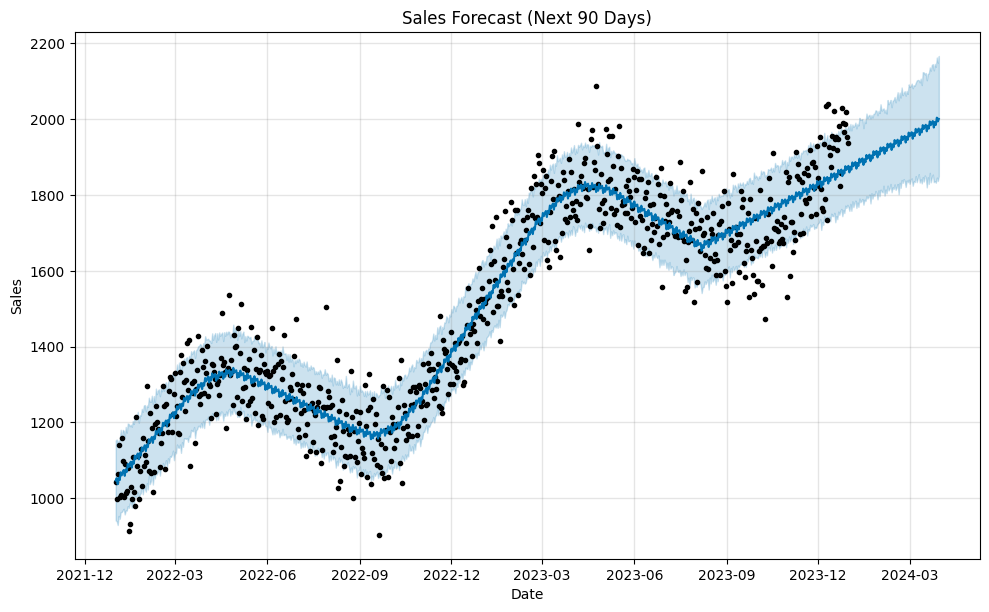

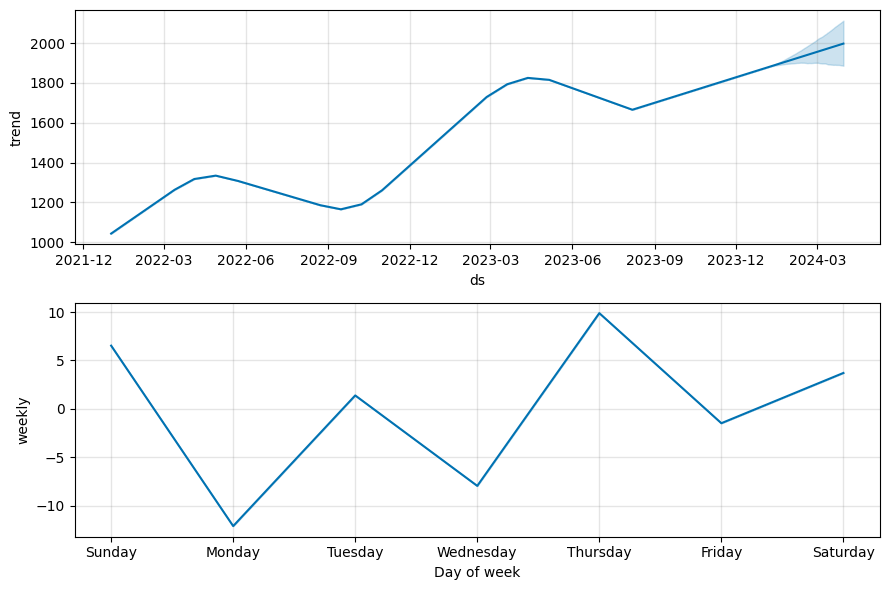

Done ✅


In [4]:
# ---------------------------
# Single Colab cell — copy & run
# ---------------------------

# 1) Install Prophet and required dependencies (runs once)
!pip install --quiet prophet cmdstanpy

# 2) Imports (ensure Prophet is defined in this runtime)
import os
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
print("prophet imported:", Prophet)

# 3) Load dataset
# Try a few common locations: uploaded file, /content, /mnt/data (assistant-generated)
possible_paths = [
    "retail_sales_dataset.csv",          # if you uploaded to Colab
    "/content/retail_sales_dataset.csv", # common Colab path
    "/mnt/data/retail_sales_dataset.csv" # path from assistant generation
]

csv_path = None
for p in possible_paths:
    if os.path.exists(p):
        csv_path = p
        break

if csv_path is None:
    # If file not found, raise helpful error with instructions
    raise FileNotFoundError(
        "retail_sales_dataset.csv not found. Upload the CSV to Colab using the left-side 'Files' pane or run:\n\n"
        "from google.colab import files\nuploaded = files.upload()\n\n"
        "Then re-run this cell."
    )

print("Loading dataset from:", csv_path)
df = pd.read_csv(csv_path)

# quick sanity check
print("Rows:", len(df), "Columns:", df.columns.tolist())
display(df.head())

# 4) Prepare data for Prophet
df = df.rename(columns={"date": "ds", "sales": "y"})
df['ds'] = pd.to_datetime(df['ds'])

# 5) Fit Prophet model
model = Prophet()
model.fit(df)

# 6) Create future dataframe and predict (90 days)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 7) Show final forecast rows and some metrics
display(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

# 8) Plot forecast and components
fig = model.plot(forecast)
plt.title("Sales Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

print("Done ✅")
